In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
corr_matrix = data.corr()

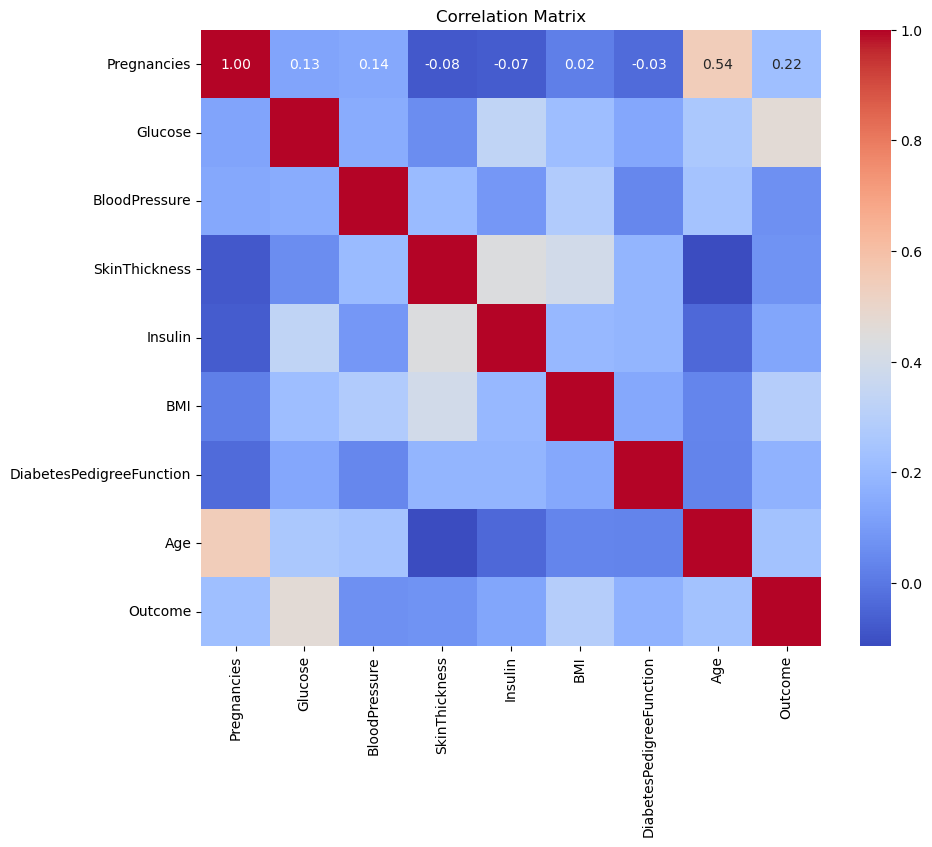

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [8]:
from sklearn.feature_selection import mutual_info_classif

In [10]:
x = data.drop(columns='Outcome')
y = data['Outcome']

In [12]:
mi_scores = mutual_info_classif(x, y)

In [13]:
mi_scores_df = pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='Mutual Information', ascending=False)
print(mi_scores_df)

                    Feature  Mutual Information
1                   Glucose            0.110890
5                       BMI            0.076105
7                       Age            0.057229
4                   Insulin            0.045918
0               Pregnancies            0.035527
6  DiabetesPedigreeFunction            0.016564
3             SkinThickness            0.010795
2             BloodPressure            0.008498


In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression(max_iter=1000)

In [16]:
rfe = RFE(estimator=model, n_features_to_select=5)

In [17]:
rfe.fit(x, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

In [20]:
selected_features = x.columns[rfe.support_]
print("Selected Features by RFE:", selected_features.tolist())

Selected Features by RFE: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [21]:
s_features_correlation = corr_matrix['Outcome'].abs().sort_values(ascending=False).index[1:6]
s_features_mi = mi_scores_df['Feature'][:5].values
s_features_rfe = selected_features.tolist()

In [22]:
print('Top 5 Features by Correlation Analysis:', s_features_correlation.tolist())
print('Top 5 Features by Mutual Information:', s_features_mi.tolist())
print('Top 5 Features by RFE:', s_features_rfe)

Top 5 Features by Correlation Analysis: ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']
Top 5 Features by Mutual Information: ['Glucose', 'BMI', 'Age', 'Insulin', 'Pregnancies']
Top 5 Features by RFE: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [23]:
f_selected_features = set(s_features_correlation).union(s_features_mi).union(s_features_rfe)
print('Final Selected Features:', f_selected_features)

Final Selected Features: {'Glucose', 'DiabetesPedigreeFunction', 'Pregnancies', 'BMI', 'Insulin', 'Age'}
